<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Customer_Segmentation_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CUSTOMER SEGMENTATION TASK**

In [450]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [401]:
df = pd.read_csv("/content/shopping_behavior_updated.csv")

In [402]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [404]:
df = df.drop('Customer ID', axis=1)

In [405]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(i);
    print(df[i].value_counts());
    print(" ")


Gender
Gender
Male      2652
Female    1248
Name: count, dtype: int64
 
Item Purchased
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64
 
Category
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
 
Location
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
Nor

In [406]:
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


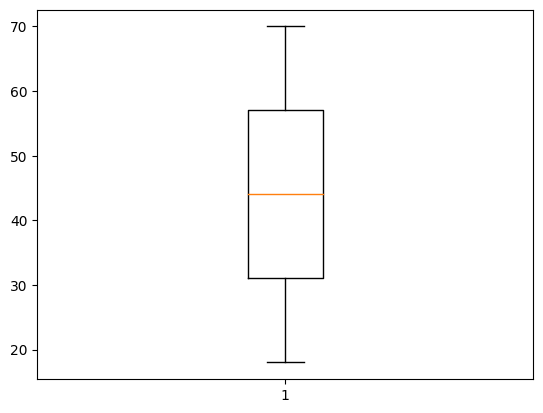

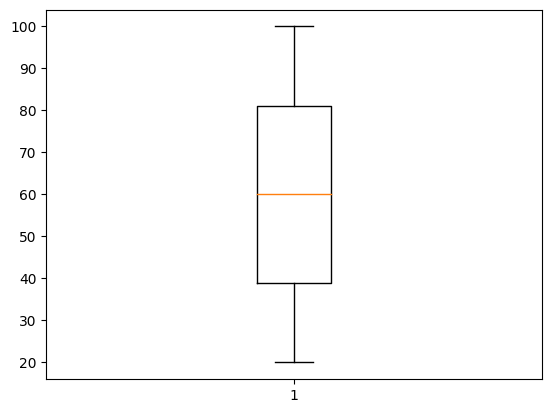

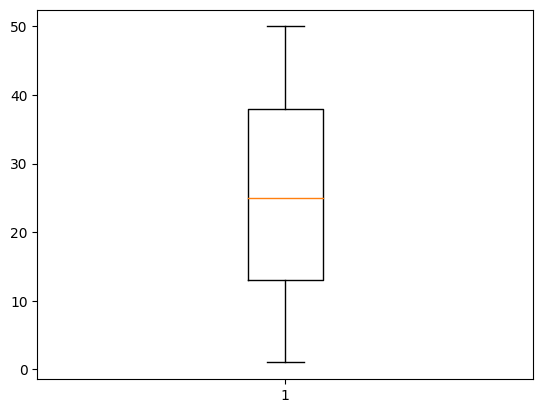

In [407]:
for i in df.columns:
  if df[i].dtype == 'int':
    plt.boxplot(df[i])
    plt.show()


In [408]:
df['Age'].max()

70

In [409]:
bins = [0, 20, 30, 40, 50, 60, 70]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
df = df.drop('Age', axis=1)

In [410]:
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

In [411]:
item_categories = {
    'Topwear' : ['Blouse', 'Sweater', 'Shirt', 'T-shirt'],
    'Bottomwear' : ['Jeans', 'Skirt', 'Shorts'],
    'Outerwear' : ['Jacket', 'Hoodie', 'Dress'],
    'Bags & Belts' : ['Handbag', 'Backpack', 'Belt'],
    'Eyewear & Jewelry' : ['Sunglasses', 'Jewelry'],
    'Winter Wear' : ['Scarf', 'Hat', 'Gloves'],
    'Footwear' : ['Shoes', 'Boots', 'Sandals','Sneakers']
}

item_to_category = {item: category for category, items in item_categories.items() for item in items}

# Now use this dictionary to map the 'Item Purchased' column to 'Item Category'
df['Item Category'] = df['Item Purchased'].map(item_to_category)

In [412]:
df[df['Category']=='Footwear']['Item Purchased'].unique()

array(['Sandals', 'Sneakers', 'Shoes', 'Boots'], dtype=object)

In [413]:
df['Item Category'].value_counts()

,count
Item Category,
Topwear,651
Footwear,599
Outerwear,480
Bags & Belts,457
Winter Wear,451
Bottomwear,439
Eyewear & Jewelry,332


In [414]:
df = df.drop('Item Purchased', axis=1)

In [415]:
state_buckets = {
    'Northeast': [
        'Maine', 'Massachusetts', 'Rhode Island', 'New Hampshire',
        'New York', 'New Jersey', 'Connecticut', 'Pennsylvania',
        'Vermont'
    ],
    'Midwest': [
        'Ohio', 'Michigan', 'Indiana', 'Illinois', 'Wisconsin',
        'Minnesota', 'Iowa', 'Missouri', 'North Dakota',
        'South Dakota', 'Nebraska', 'Kansas'
    ],
    'South': [
        'Delaware', 'Maryland', 'West Virginia', 'Virginia',
        'North Carolina', 'South Carolina', 'Georgia', 'Florida',
        'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 'Arkansas',
        'Louisiana', 'Oklahoma', 'Texas'
    ],
    'West': [
        'Montana', 'Wyoming', 'Colorado', 'New Mexico', 'Idaho',
        'Utah', 'Arizona', 'Nevada', 'California', 'Oregon',
        'Washington', 'Alaska', 'Hawaii'
    ]
}

item_to_category = {item: category for category, items in state_buckets.items() for item in items}

# Now use this dictionary to map the 'Item Purchased' column to 'Item Category'
df['Locations'] = df['Location'].map(item_to_category)

In [416]:
df['Locations'].value_counts()

,count
Locations,
South,1271
West,1018
Midwest,937
Northeast,674


In [417]:
df = df.drop('Location',axis=1)

In [418]:
color_buckets = {
    'Neutrals': [
        'Gray', 'White', 'Charcoal', 'Silver', 'Black', 'Beige'
    ],
    'Warm Colors': [
        'Maroon', 'Red', 'Pink', 'Peach', 'Orange', 'Gold', 'Yellow', 'Brown'
    ],
    'Cool Colors': [
        'Turquoise', 'Teal', 'Cyan', 'Blue', 'Green', 'Olive'
    ],
    'Bold Colors': [
        'Purple', 'Violet', 'Indigo', 'Magenta'
    ],
    'Pastel Colors': [
        'Lavender'
    ]
}


item_to_category = {item: category for category, items in color_buckets.items() for item in items}

# Now use this dictionary to map the 'Item Purchased' column to 'Item Category'
df['Colors'] = df['Color'].map(item_to_category)

In [419]:
df = df.drop('Color', axis=1)

In [420]:
df.head()

,Gender,Category,Purchase Amount (USD),Size,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_Group,Item Category,Locations,Colors
0,Male,Clothing,53,L,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,51-60,Topwear,South,Neutrals
1,Male,Clothing,64,L,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0-20,Topwear,Northeast,Warm Colors
2,Male,Clothing,73,S,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,41-50,Bottomwear,Northeast,Warm Colors
3,Male,Footwear,90,M,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,21-30,Footwear,Northeast,Warm Colors
4,Male,Clothing,49,M,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,41-50,Topwear,West,Cool Colors


In [421]:
import numpy as np

review_ratings = [3.1, 3.5, 2.7, 2.9, 3.2, 2.6, 4.8, 4.1, 4.9, 4.5, 4.7, 2.8, 4.6,
                  3.3, 4.4, 3.6, 5.0, 4.0, 3.7, 4.2, 3.9, 3.0, 3.8, 3.4, 4.3, 2.5]

# Bucket the values into integers
bucketed_ratings = np.round(review_ratings).astype(int)

df['Review_Ratings'] = np.round(df['Review Rating']).astype(int)

In [422]:
df['Review_Ratings'].value_counts()

,count
Review_Ratings,
4,1710
3,1424
5,700
2,66


In [423]:
df = df.drop('Review Rating',axis=1)

In [424]:
df.head()

,Gender,Category,Purchase Amount (USD),Size,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_Group,Item Category,Locations,Colors,Review_Ratings
0,Male,Clothing,53,L,Winter,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,51-60,Topwear,South,Neutrals,3
1,Male,Clothing,64,L,Winter,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0-20,Topwear,Northeast,Warm Colors,3
2,Male,Clothing,73,S,Spring,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,41-50,Bottomwear,Northeast,Warm Colors,3
3,Male,Footwear,90,M,Spring,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,21-30,Footwear,Northeast,Warm Colors,4
4,Male,Clothing,49,M,Spring,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,41-50,Topwear,West,Cool Colors,3


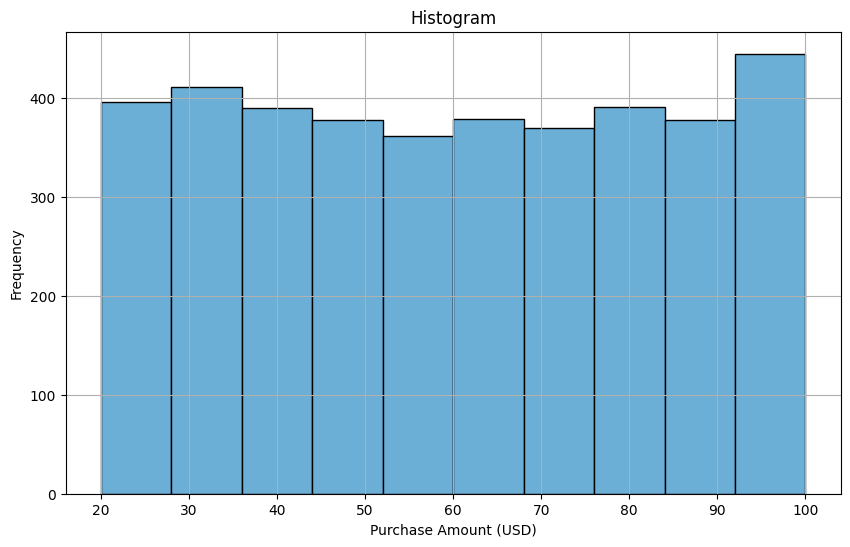

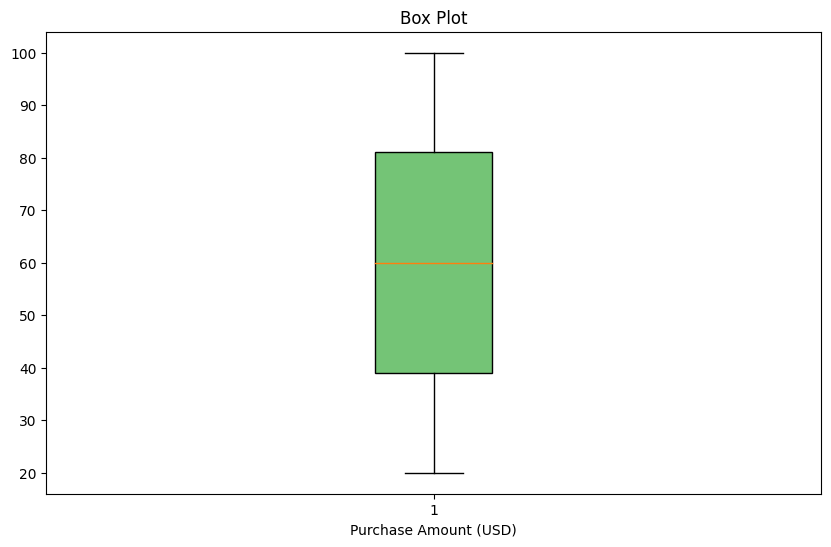

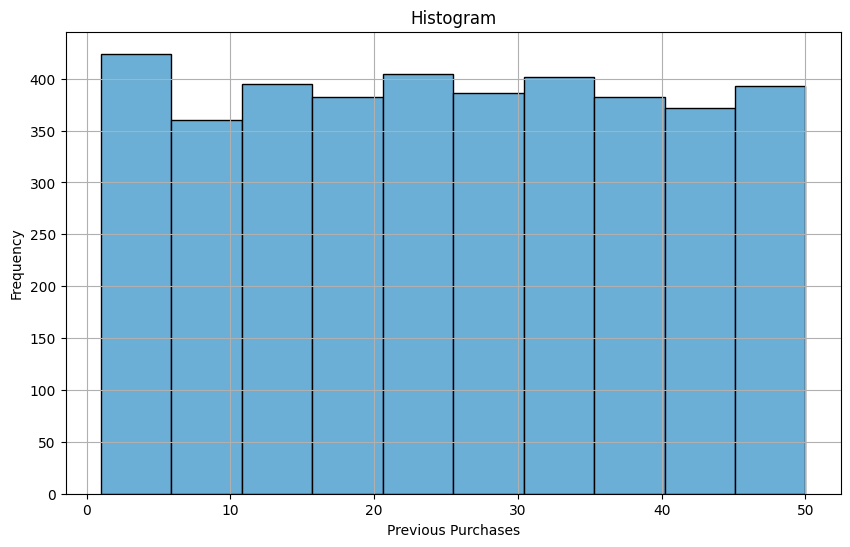

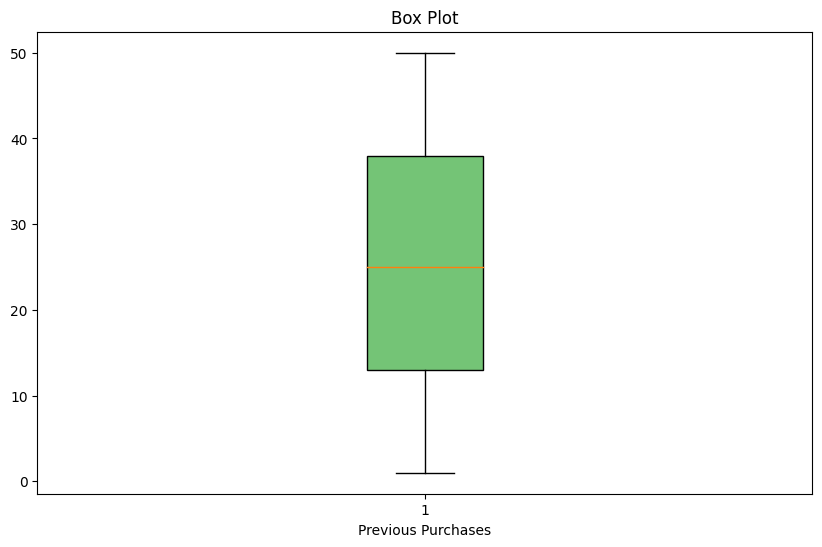

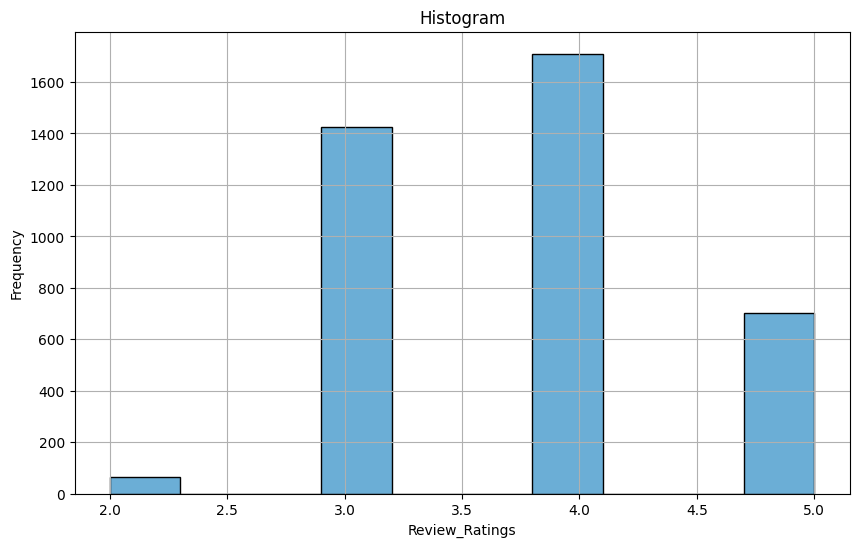

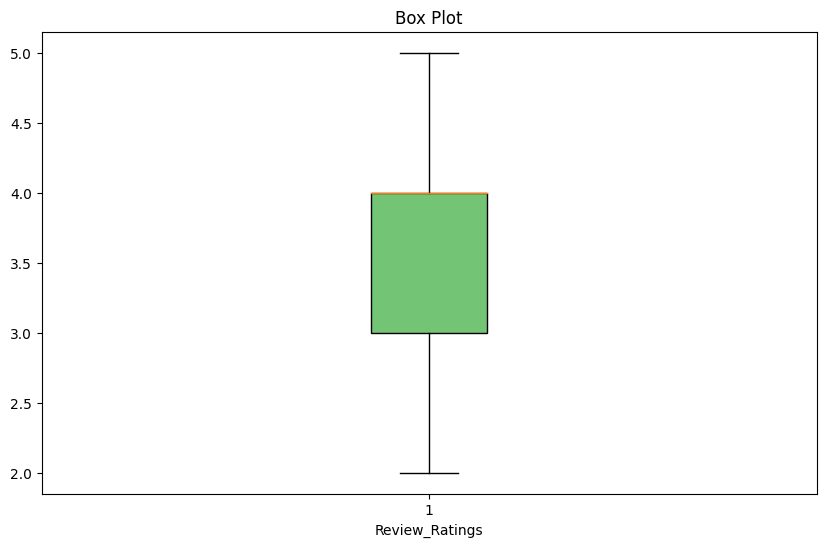

In [425]:
for i in df.columns:
  if(df[i].dtype=='int64'):
    plt.figure(figsize=(10, 6))
    plt.hist(df[i], bins=10, color='#6baed6', edgecolor='black')
    plt.title('Histogram')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Plot box plot for income
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[i], patch_artist=True, boxprops=dict(facecolor='#74c476'))
    plt.title('Box Plot')
    plt.xlabel(i)
    plt.show()

    print(" ")

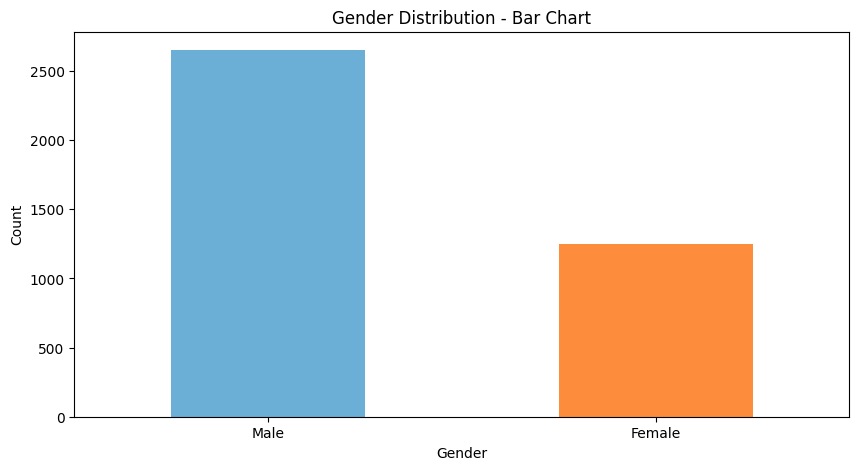

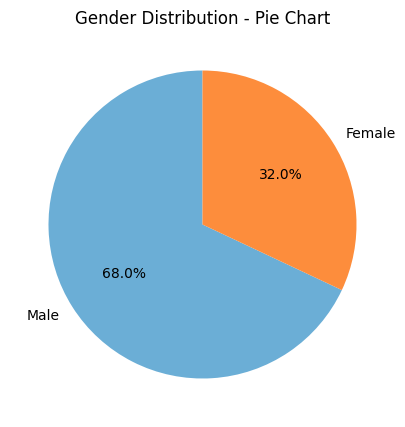

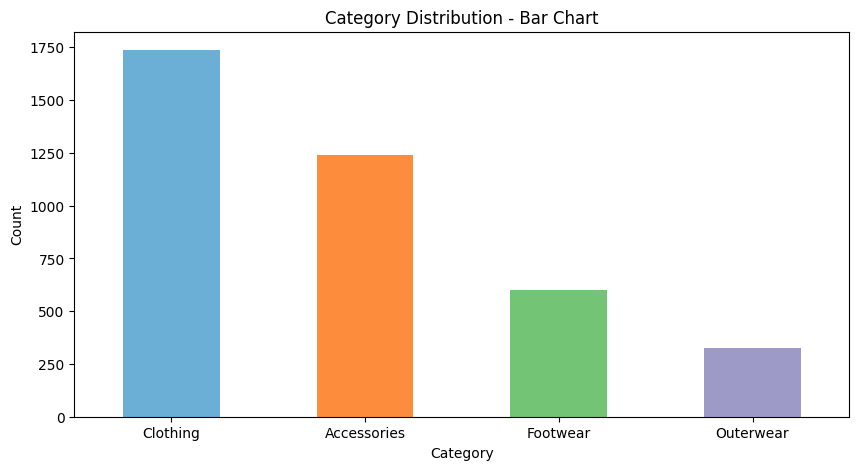

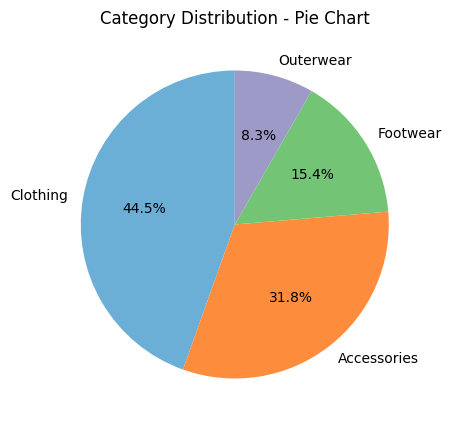

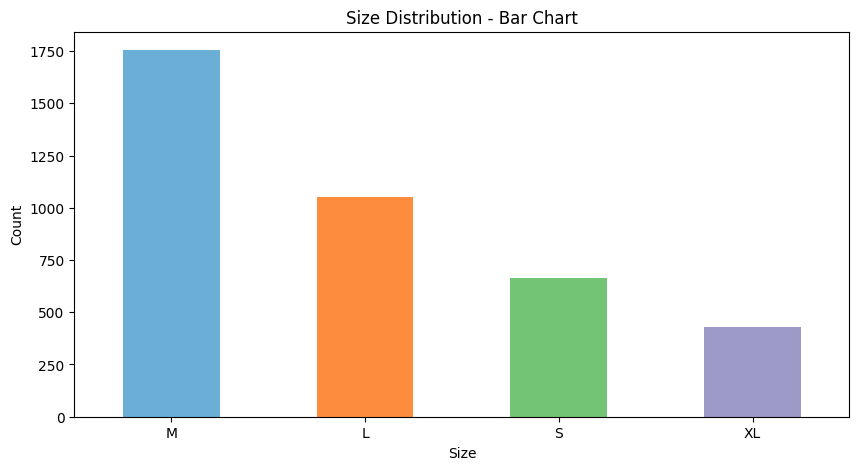

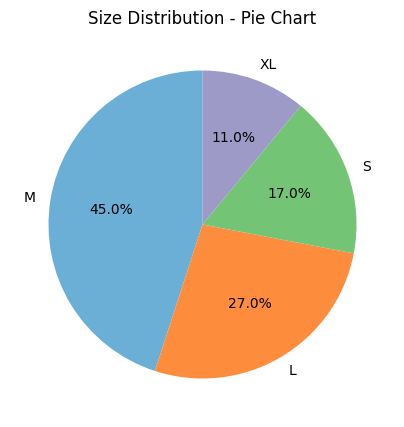

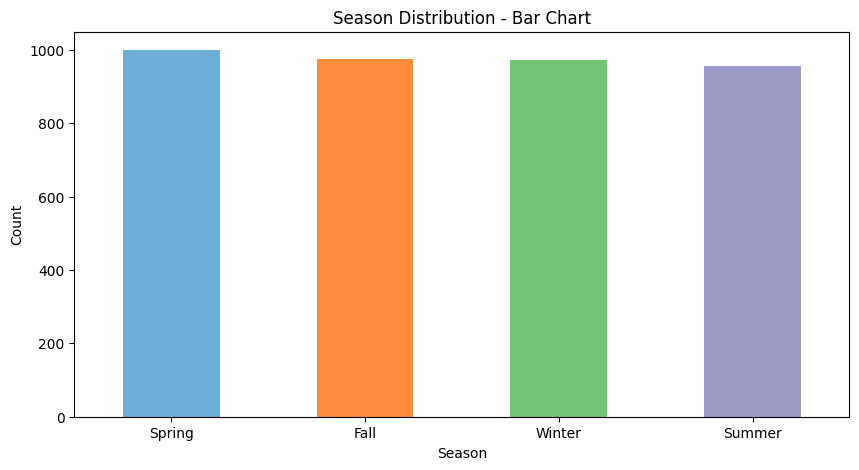

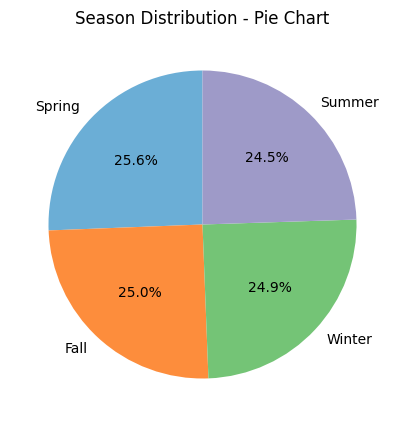

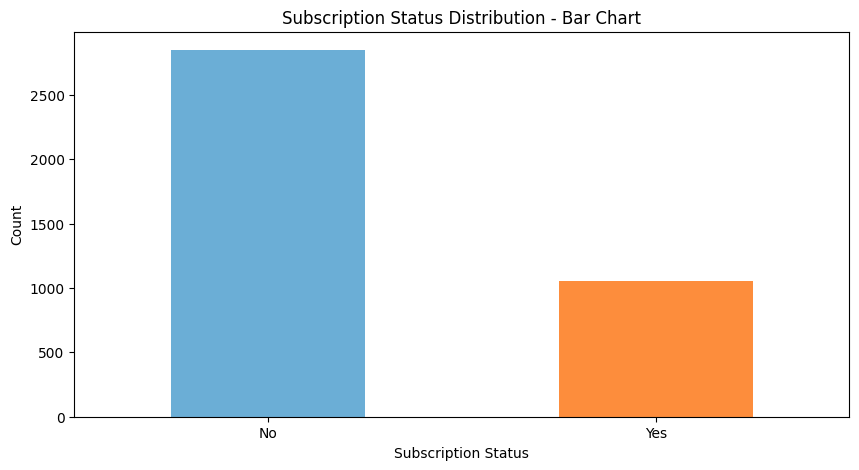

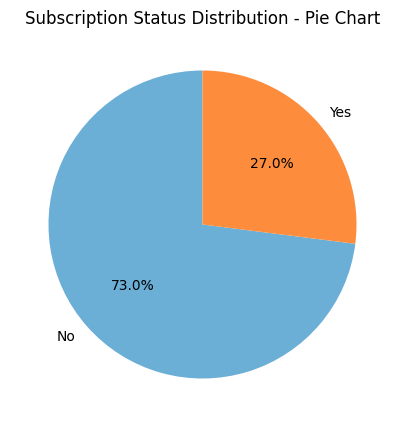

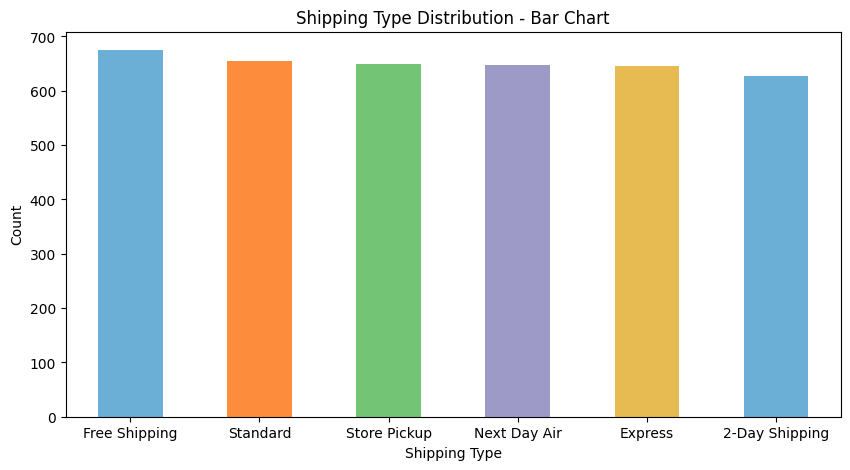

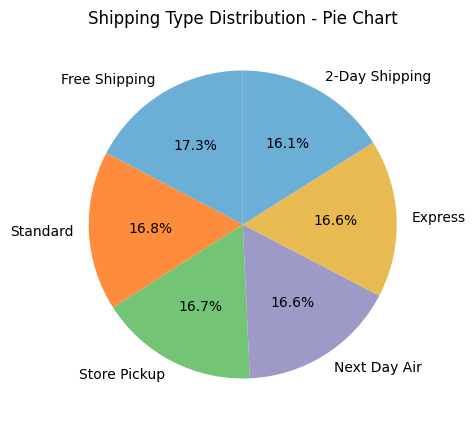

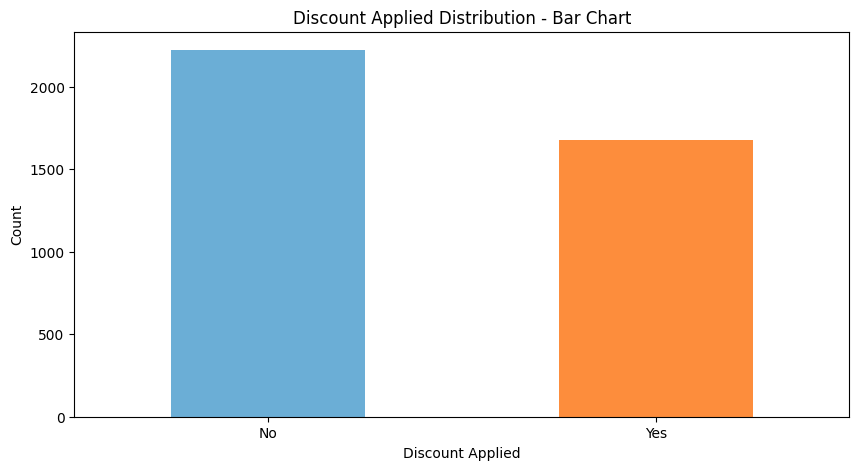

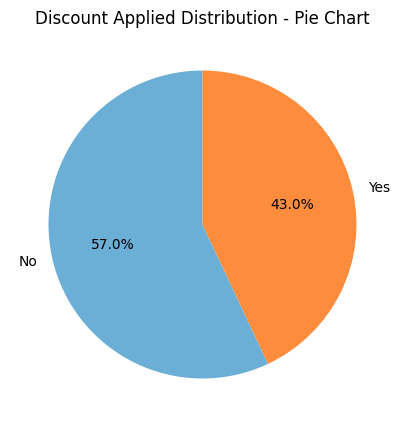

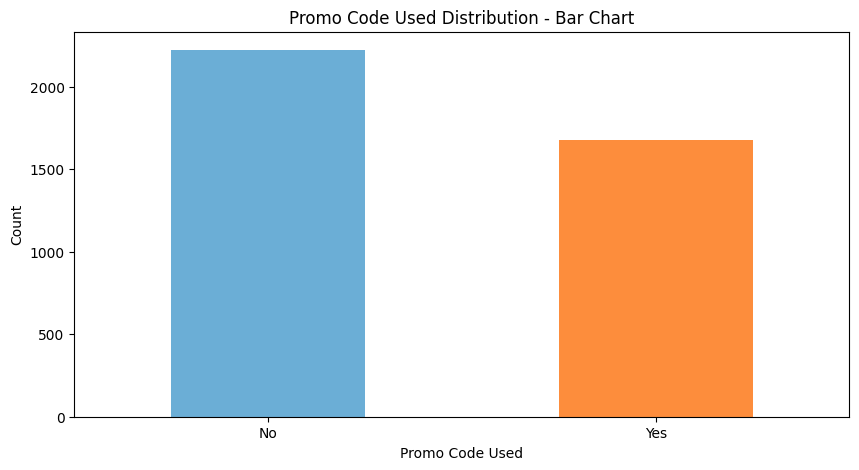

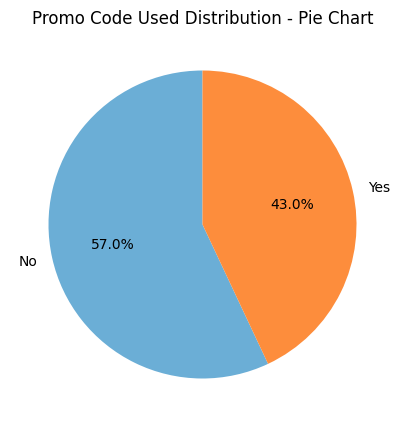

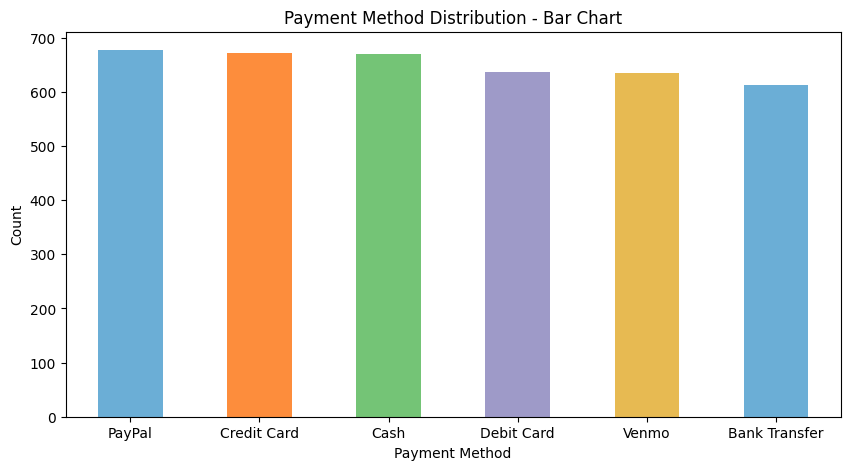

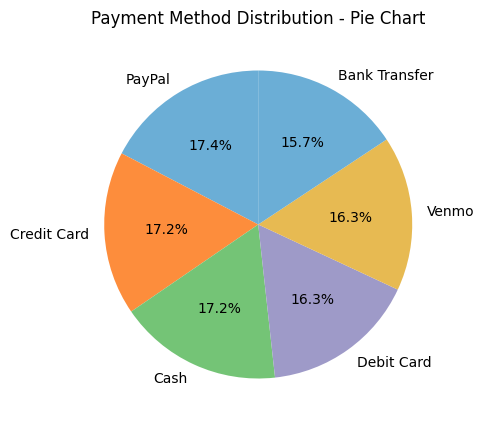

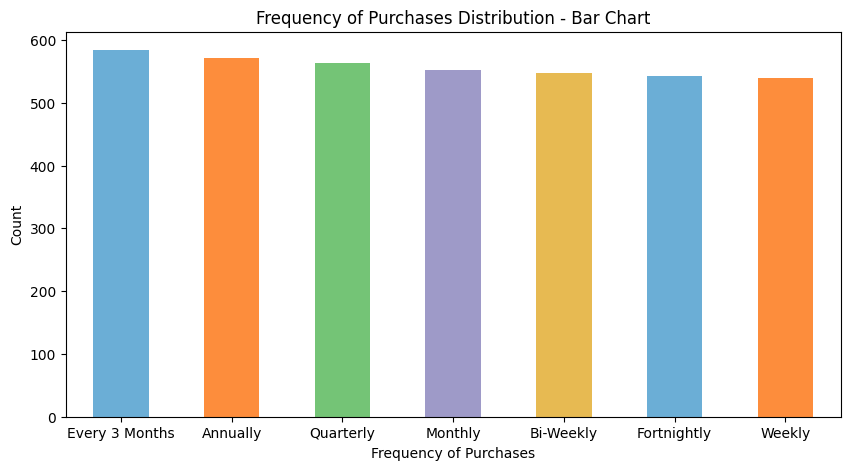

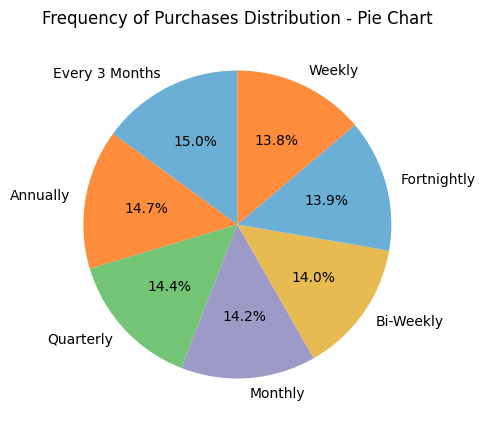

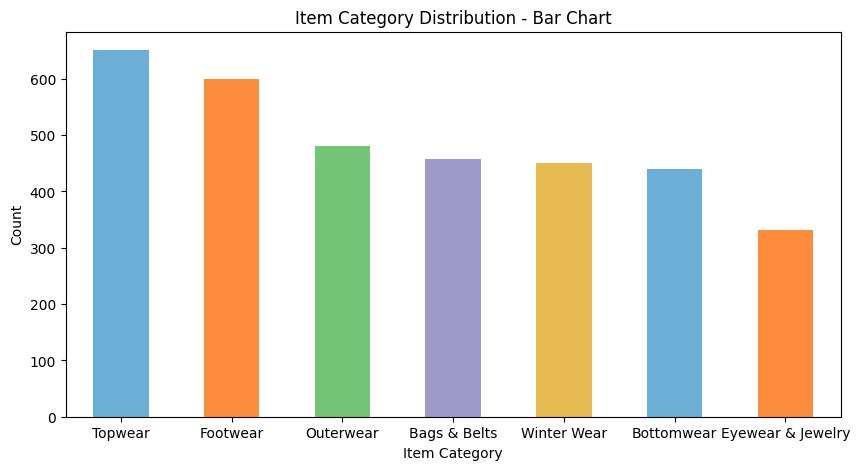

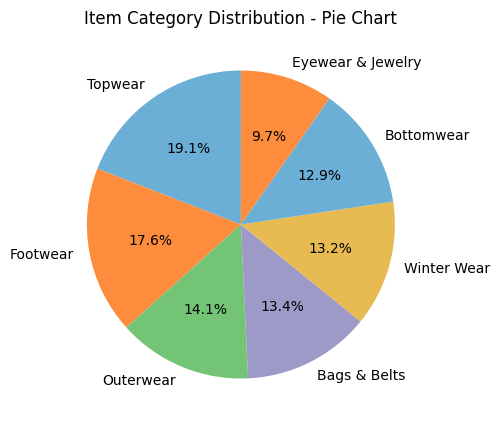

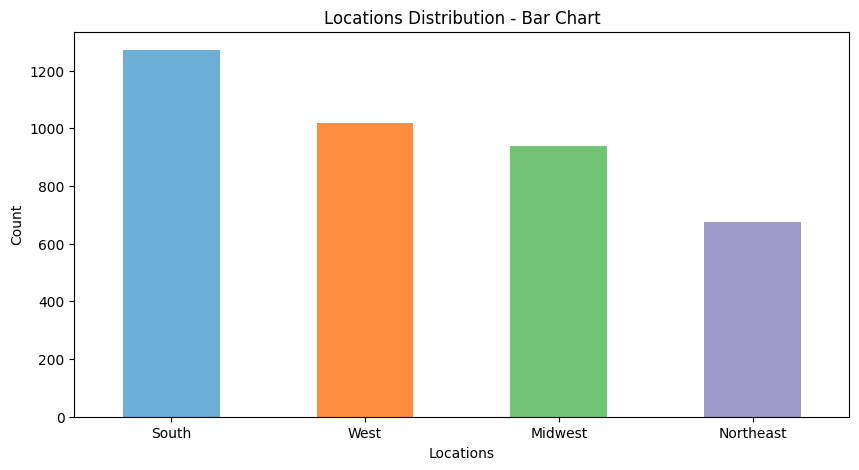

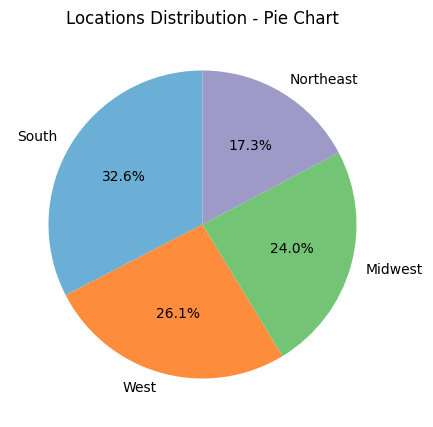

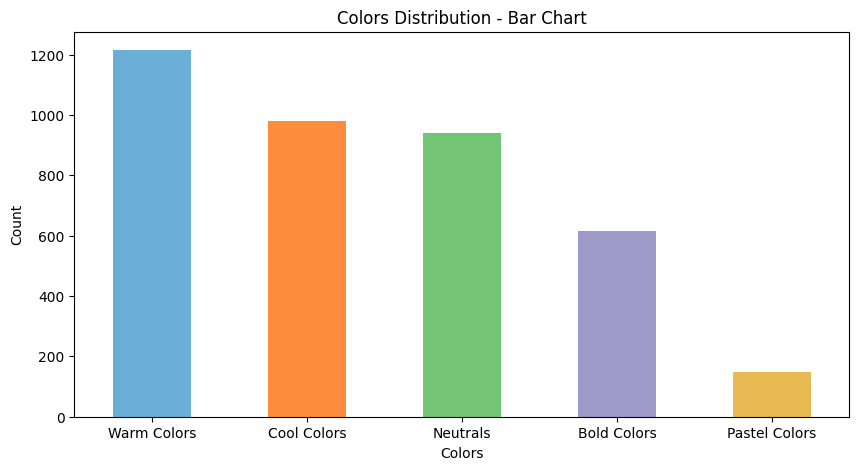

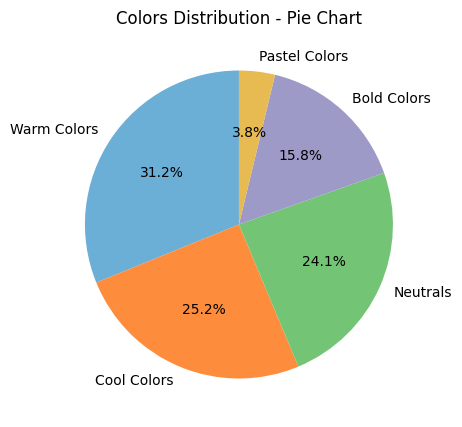

In [426]:
colors = ['#6baed6', '#fd8d3c', '#74c476', '#9e9ac8', '#e7ba52']

for i in df.columns:
    if df[i].dtype == 'object':
        counts = df[i].value_counts()

        plt.figure(figsize=(10, 5))
        counts.plot(kind='bar', color=colors[:len(counts)])
        plt.title(f'{i} Distribution - Bar Chart')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.show()


        plt.figure(figsize=(12, 5))
        counts.plot(kind='pie', autopct='%1.1f%%', colors=colors[:len(counts)], startangle=90)
        plt.title(f'{i} Distribution - Pie Chart')
        plt.ylabel('')
        plt.show()


        print(" ")

In [427]:
df.columns

Index(['Gender', 'Category', 'Purchase Amount (USD)', 'Size', 'Season',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Payment Method',
       'Frequency of Purchases', 'Age_Group', 'Item Category', 'Locations',
       'Colors', 'Review_Ratings'],
      dtype='object')

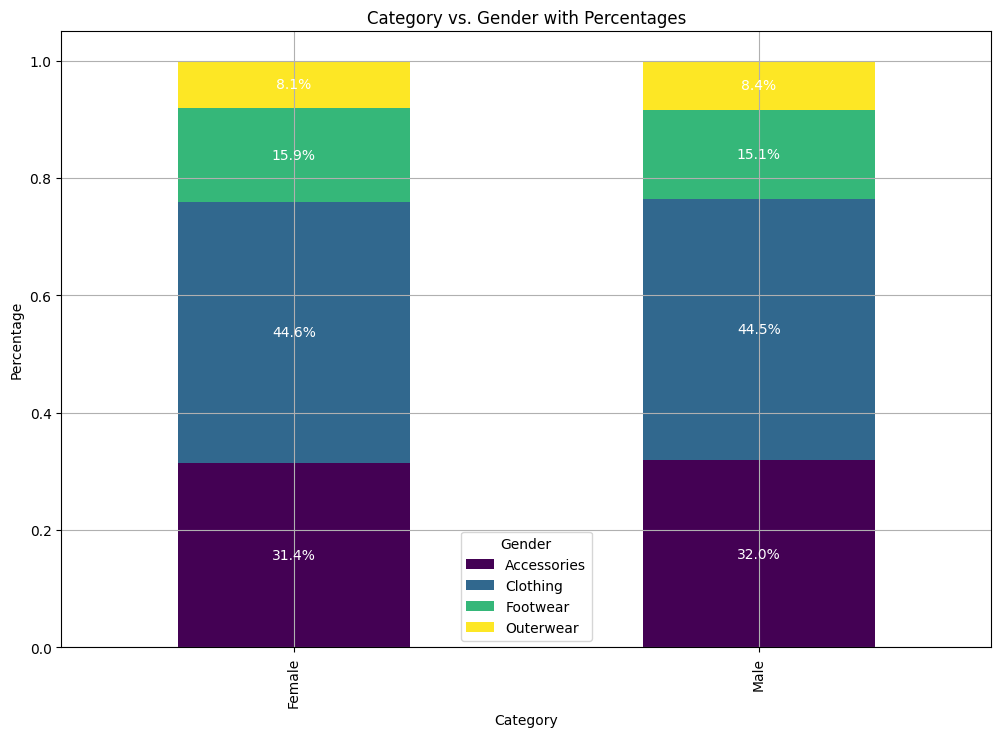

In [428]:
from scipy.stats import chi2_contingency

# Calculate the crosstab
ct = pd.crosstab
ct_result = ct(df['Gender'], df['Category'])

# Plotting the percentages
ax = ct_result.div(ct_result.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Add percentage labels
for container in ax.containers:
    labels = [f'{v * 100:.1f}%' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', color='white')

ax.set_title('Category vs. Gender with Percentages')
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

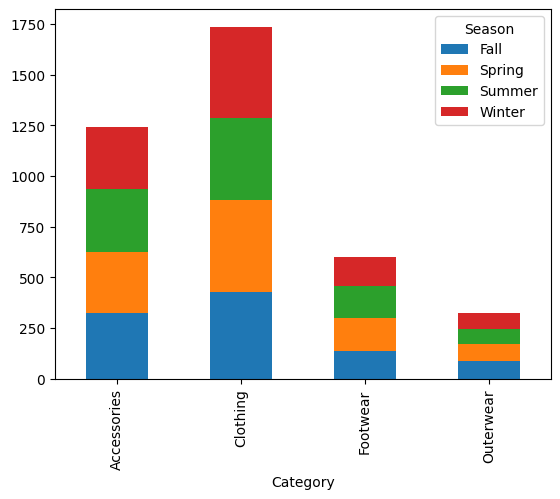

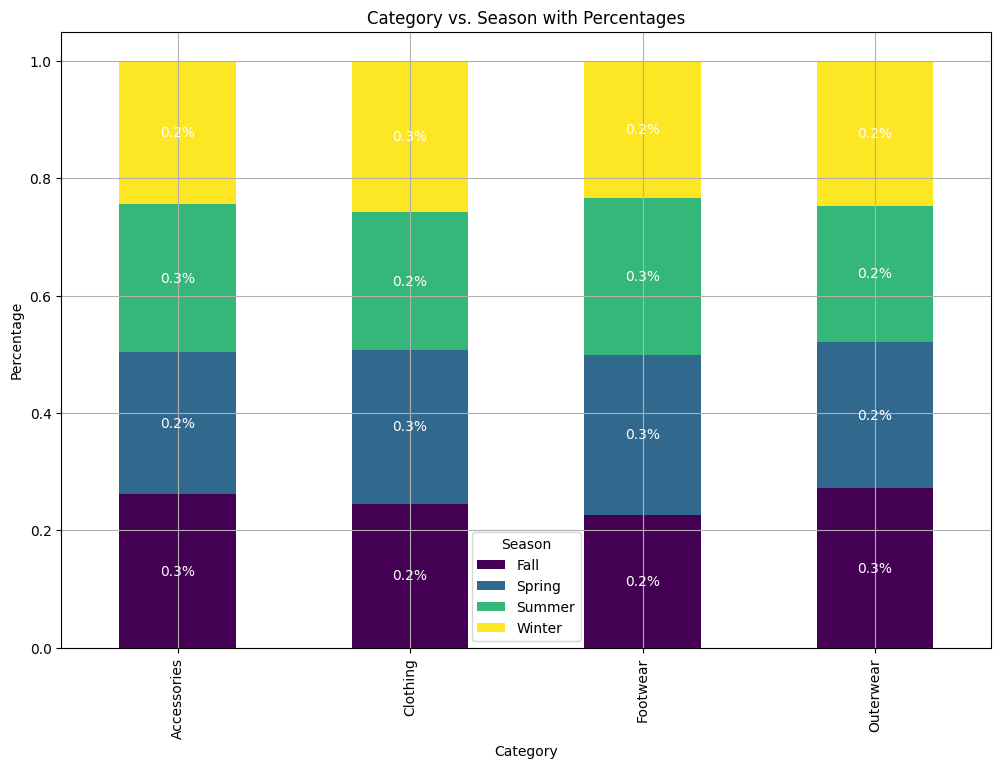

Chi-square test p-value: 0.5408444018435854


In [429]:
ct = pd.crosstab
ct_result = ct(df['Category'], df['Season'])

pd.crosstab(df['Category'], df['Season']).plot(kind='bar', stacked=True)

ct = pd.crosstab(df['Category'], df['Season'])

# Plot stacked bar chart with percentages
ax = ct.div(ct.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', color='white')

ax.set_title('Category vs. Season with Percentages')
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Season')
plt.grid(True)
plt.show()

# Chi-square test
chi2, p, dof, ex = chi2_contingency(ct)
print(f'Chi-square test p-value: {p}')

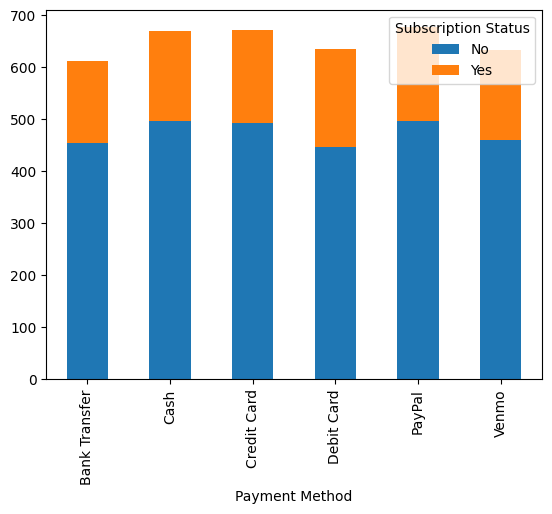

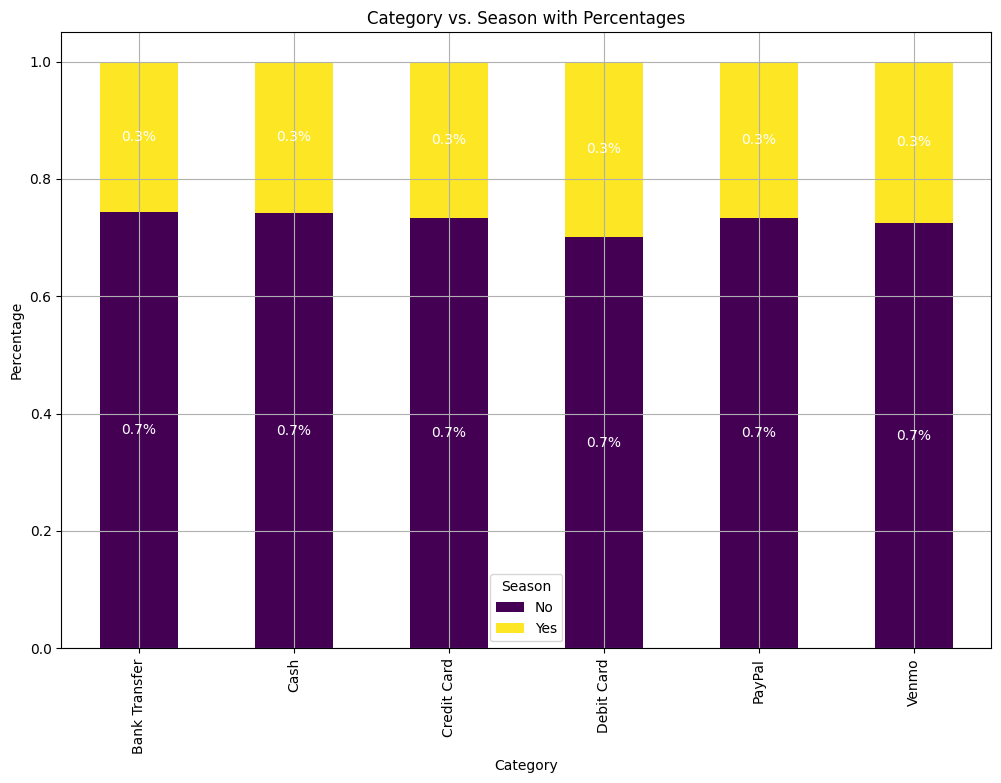

Chi-square test p-value: 0.569927650448781


In [430]:
ct = pd.crosstab
ct_result = ct(df['Payment Method'], df['Subscription Status'])

pd.crosstab(df['Payment Method'], df['Subscription Status']).plot(kind='bar', stacked=True)

ct = pd.crosstab(df['Payment Method'], df['Subscription Status'])

# Plot stacked bar chart with percentages
ax = ct.div(ct.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', color='white')

ax.set_title('Category vs. Season with Percentages')
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Season')
plt.grid(True)
plt.show()


chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Payment Method'], df['Subscription Status']))
print(f'Chi-square test p-value: {p}')

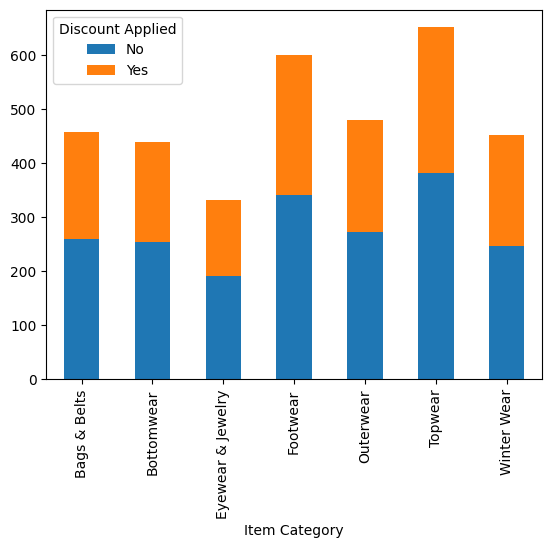

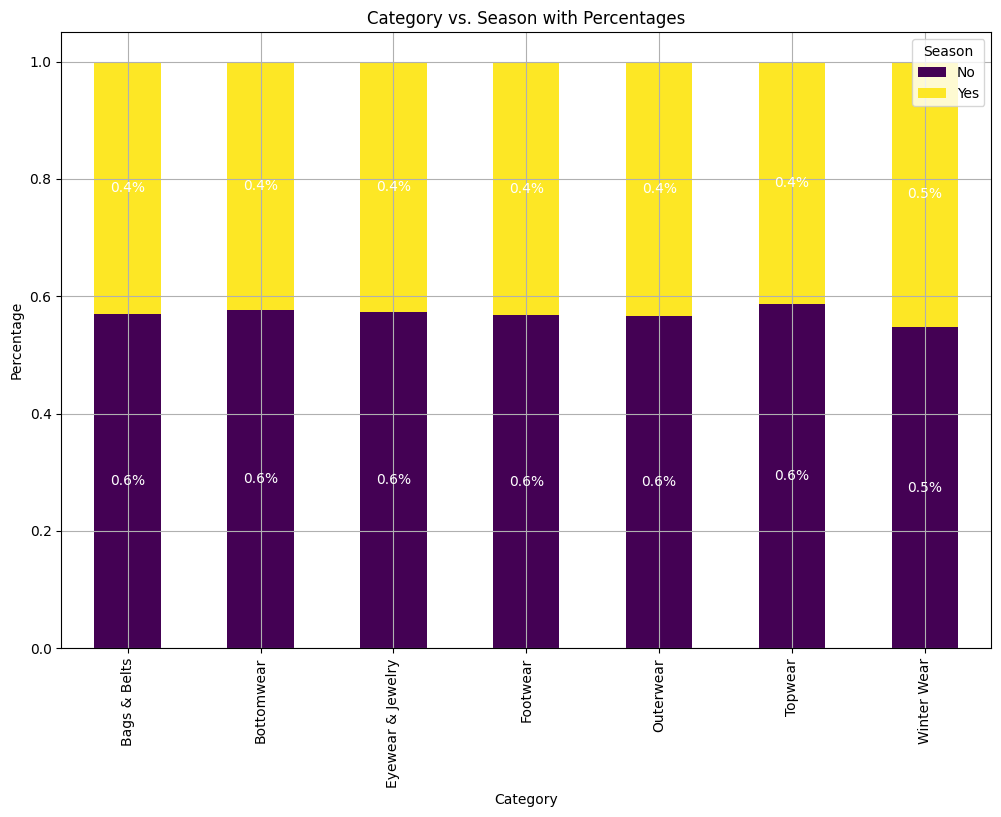

Chi-square test p-value: 0.9386439445400431


In [431]:
ct = pd.crosstab
ct_result = ct(df['Item Category'], df['Discount Applied'])

pd.crosstab(df['Item Category'], df['Discount Applied']).plot(kind='bar', stacked=True)

ct = pd.crosstab(df['Item Category'], df['Discount Applied'])

# Plot stacked bar chart with percentages
ax = ct.div(ct.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', color='white')

ax.set_title('Category vs. Season with Percentages')
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Season')
plt.grid(True)
plt.show()


chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Item Category'], df['Discount Applied']))
print(f'Chi-square test p-value: {p}')

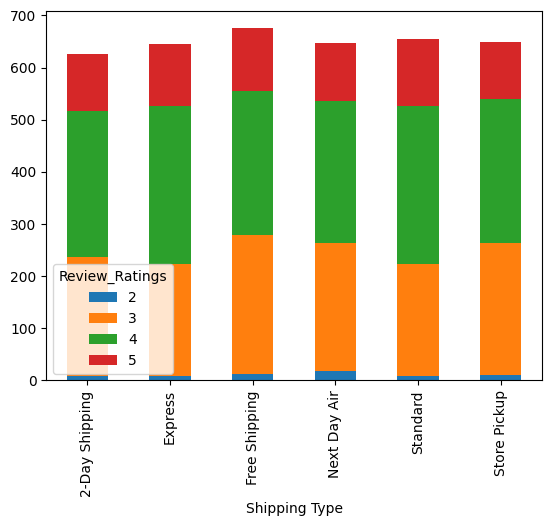

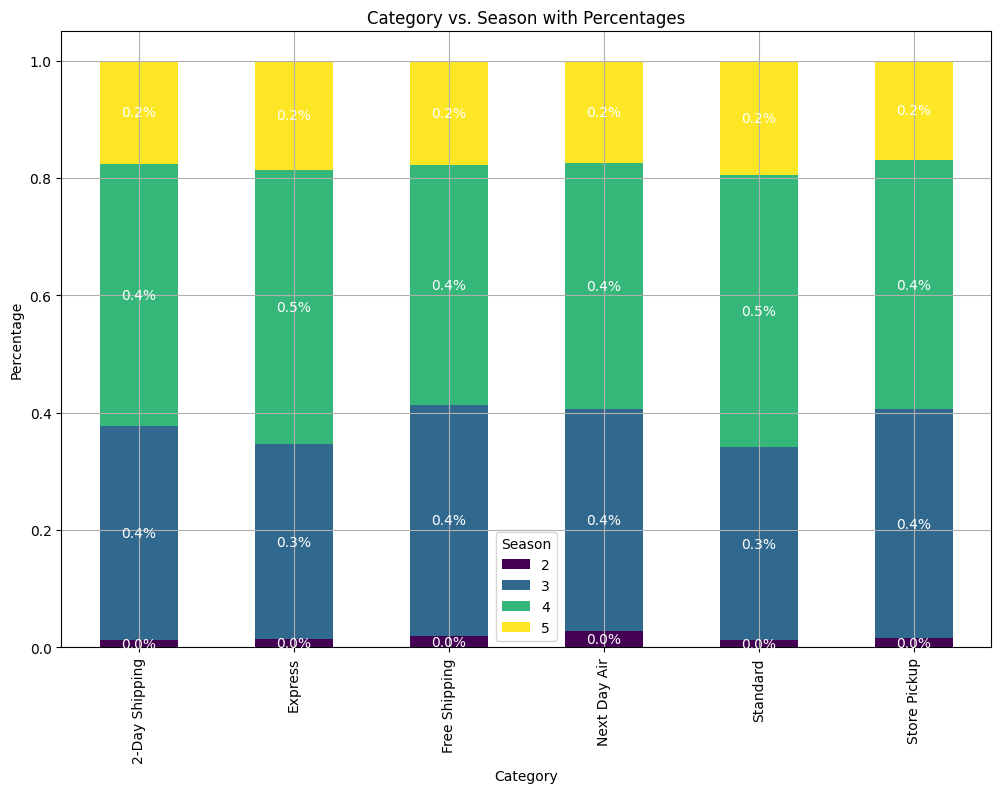

Chi-square test p-value: 0.17646904052664206


In [432]:
ct = pd.crosstab
ct_result = ct(df['Shipping Type'], df['Review_Ratings'])

pd.crosstab(df['Shipping Type'], df['Review_Ratings']).plot(kind='bar', stacked=True)

ct = pd.crosstab(df['Shipping Type'], df['Review_Ratings'])

# Plot stacked bar chart with percentages
ax = ct.div(ct.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', color='white')

ax.set_title('Category vs. Season with Percentages')
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Season')
plt.grid(True)
plt.show()

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Shipping Type'], df['Review_Ratings']))
print(f'Chi-square test p-value: {p}')

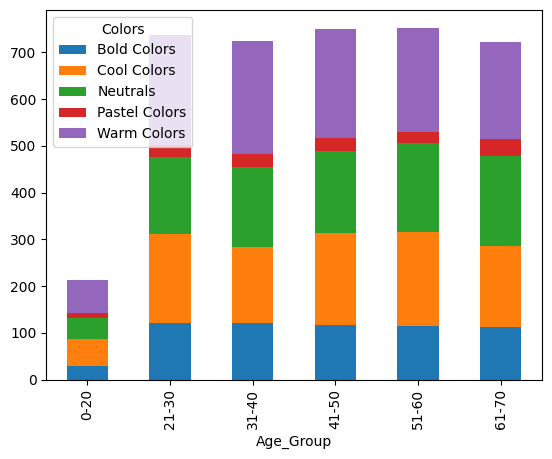

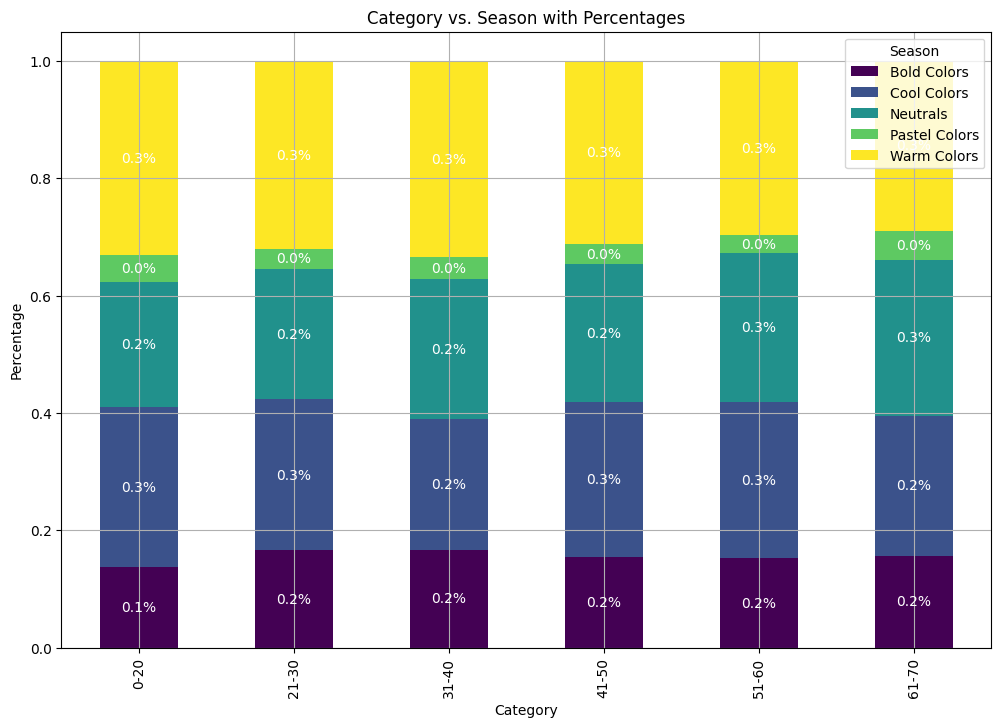

Chi-square test p-value: 0.5537764692863447


In [433]:
ct = pd.crosstab
ct_result = ct(df['Age_Group'], df['Colors'])

pd.crosstab(df['Age_Group'], df['Colors']).plot(kind='bar', stacked=True)

ct = pd.crosstab(df['Age_Group'], df['Colors'])

# Plot stacked bar chart with percentages
ax = ct.div(ct.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', color='white')

ax.set_title('Category vs. Season with Percentages')
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Season')
plt.grid(True)
plt.show()

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Age_Group'], df['Colors']))
print(f'Chi-square test p-value: {p}')

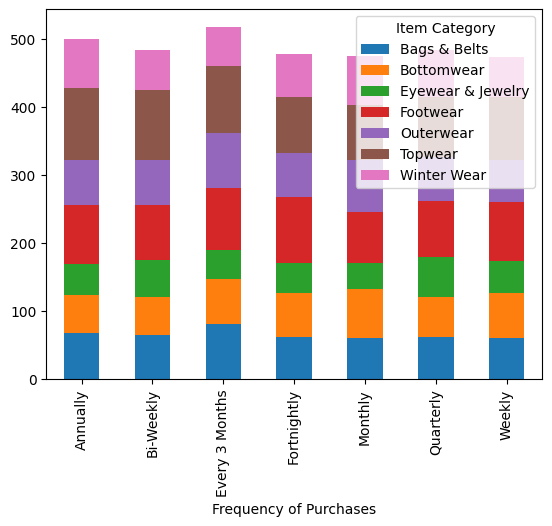

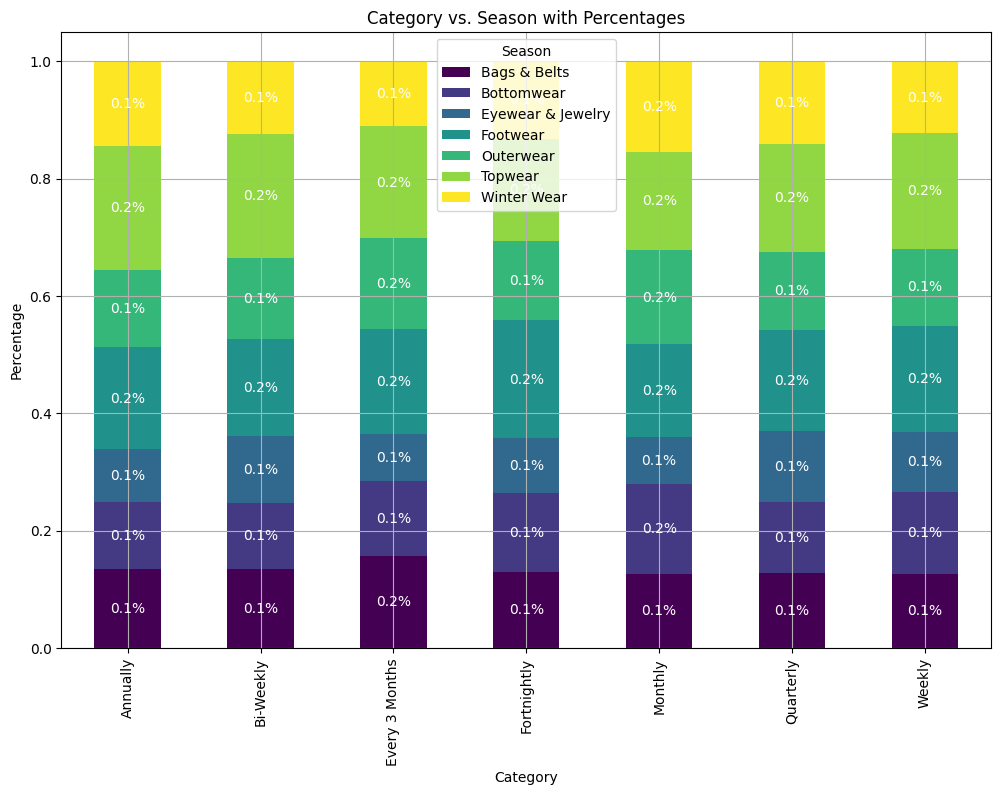

Chi-square test p-value: 0.7499290412184416


In [434]:
ct = pd.crosstab
ct_result = ct(df['Frequency of Purchases'], df['Item Category'])

pd.crosstab(df['Frequency of Purchases'], df['Item Category']).plot(kind='bar', stacked=True)

ct = pd.crosstab(df['Frequency of Purchases'], df['Item Category'])

# Plot stacked bar chart with percentages
ax = ct.div(ct.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', color='white')

ax.set_title('Category vs. Season with Percentages')
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Season')
plt.grid(True)
plt.show()

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Frequency of Purchases'], df['Item Category']))
print(f'Chi-square test p-value: {p}')

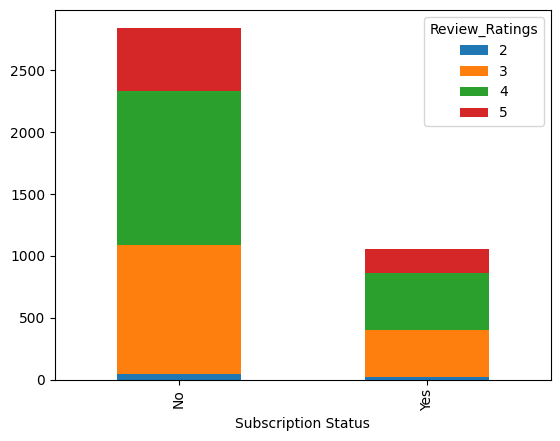

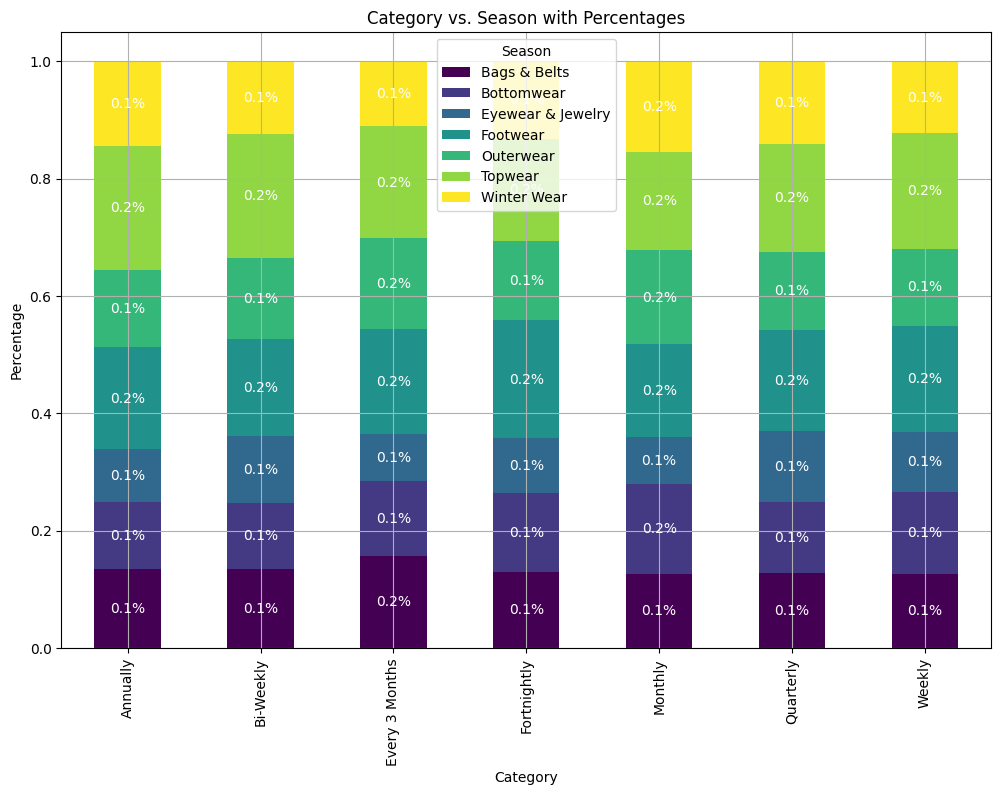

Chi-square test p-value: 0.9759917195593786


In [435]:
ct = pd.crosstab
ct_result = ct(df['Subscription Status'], df['Review_Ratings'])

pd.crosstab(df['Subscription Status'], df['Review_Ratings']).plot(kind='bar', stacked=True)

ct = pd.crosstab(df['Frequency of Purchases'], df['Item Category'])

# Plot stacked bar chart with percentages
ax = ct.div(ct.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(12, 8), cmap='viridis')

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%', color='white')

ax.set_title('Category vs. Season with Percentages')
ax.set_ylabel('Percentage')
ax.set_xlabel('Category')
plt.legend(title='Season')
plt.grid(True)
plt.show()

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Subscription Status'], df['Review_Ratings']))
print(f'Chi-square test p-value: {p}')

In [436]:
df.head()

,Gender,Category,Purchase Amount (USD),Size,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_Group,Item Category,Locations,Colors,Review_Ratings
0,Male,Clothing,53,L,Winter,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,51-60,Topwear,South,Neutrals,3
1,Male,Clothing,64,L,Winter,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0-20,Topwear,Northeast,Warm Colors,3
2,Male,Clothing,73,S,Spring,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,41-50,Bottomwear,Northeast,Warm Colors,3
3,Male,Footwear,90,M,Spring,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,21-30,Footwear,Northeast,Warm Colors,4
4,Male,Clothing,49,M,Spring,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,41-50,Topwear,West,Cool Colors,3


In [437]:
df = df.drop(['Promo Code Used'], axis=1)

In [438]:
Aise = ['Gender','Category','Size','Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Payment Method', 'Frequency of Purchases', 'Age_Group','Item Category','Locations','Colors','Review_Ratings']

for items in Aise:
  print(df[[items]].value_counts())
  print(" ")

Gender
Male      2652
Female    1248
Name: count, dtype: int64
 
Category   
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
 
Size
M       1755
L       1053
S        663
XL       429
Name: count, dtype: int64
 
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64
 
Subscription Status
No                     2847
Yes                    1053
Name: count, dtype: int64
 
Shipping Type 
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64
 
Discount Applied
No                  2223
Yes                 1677
Name: count, dtype: int64
 
Payment Method
PayPal            677
Credit Card       671
Cash              670
Debit Card        636
Venmo             634
Bank Transfer     612
Name: count, dtype: int64
 
Frequency of Purchases
Every 3 Months            584
Annually                  572
Quarter

In [439]:
df['Review_Ratings'].value_counts()

,count
Review_Ratings,
4,1710
3,1424
5,700
2,66


In [440]:
df.head()

,Gender,Category,Purchase Amount (USD),Size,Season,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,Age_Group,Item Category,Locations,Colors,Review_Ratings
0,Male,Clothing,53,L,Winter,Yes,Express,Yes,14,Venmo,Fortnightly,51-60,Topwear,South,Neutrals,3
1,Male,Clothing,64,L,Winter,Yes,Express,Yes,2,Cash,Fortnightly,0-20,Topwear,Northeast,Warm Colors,3
2,Male,Clothing,73,S,Spring,Yes,Free Shipping,Yes,23,Credit Card,Weekly,41-50,Bottomwear,Northeast,Warm Colors,3
3,Male,Footwear,90,M,Spring,Yes,Next Day Air,Yes,49,PayPal,Weekly,21-30,Footwear,Northeast,Warm Colors,4
4,Male,Clothing,49,M,Spring,Yes,Free Shipping,Yes,31,PayPal,Annually,41-50,Topwear,West,Cool Colors,3


In [441]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Size'] = label_encoder.fit_transform(df['Size'])
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Subscription Status'] = label_encoder.fit_transform(df['Subscription Status'])
df['Shipping Type'] = label_encoder.fit_transform(df['Shipping Type'])
df['Discount Applied'] = label_encoder.fit_transform(df['Discount Applied'])
df['Payment Method'] = label_encoder.fit_transform(df['Payment Method'])
df['Frequency of Purchases'] = label_encoder.fit_transform(df['Frequency of Purchases'])
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])
df['Item Category'] = label_encoder.fit_transform(df['Item Category'])
df['Locations'] = label_encoder.fit_transform(df['Locations'])
df['Colors'] = label_encoder.fit_transform(df['Colors'])


In [442]:
df.head()

,Gender,Category,Purchase Amount (USD),Size,Season,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,Age_Group,Item Category,Locations,Colors,Review_Ratings
0,1,1,53,0,3,1,1,1,14,5,3,4,5,2,2,3
1,1,1,64,0,3,1,1,1,2,1,3,0,5,1,4,3
2,1,1,73,2,1,1,2,1,23,2,6,3,1,1,4,3
3,1,2,90,1,1,1,3,1,49,4,6,1,3,1,4,4
4,1,1,49,1,1,1,2,1,31,4,0,3,5,3,1,3


In [443]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Perform hierarchical clustering
Z = linkage(df, method='ward')
df['cluster'] = fcluster(Z, t=3, criterion='maxclust')

In [444]:
from sklearn.metrics import silhouette_score

numerical_features = ['Gender','Category', 'Purchase Amount (USD)','Size','Subscription Status','Shipping Type', 'Discount Applied','Previous Purchases', 'Payment Method', 'Frequency of Purchases', 'Age_Group', 'Item Category', 'Locations', 'Colors', 'Review_Ratings']
silhouette_avg = silhouette_score(df[numerical_features], df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.35197054586955795


In [445]:
print(df.groupby('cluster').mean().round().astype(int))

         Gender  Category  Purchase Amount (USD)  Size  Season  \
cluster                                                          
1             1         1                     82     1       1   
2             1         1                     42     1       1   
3             1         1                     41     1       2   

         Subscription Status  Shipping Type  Discount Applied  \
cluster                                                         
1                          0              2                 0   
2                          0              3                 0   
3                          0              3                 0   

         Previous Purchases  Payment Method  Frequency of Purchases  \
cluster                                                               
1                        26               3                       3   
2                        10               2                       3   
3                        35               3                

#**Cluster 1**:
Gender: 1 (Male)
Category: 1 (Clothing)
Purchase Amount (USD): 82 (High purchase amount)
Size: 1 (M)
Season: 1 (Spring)
Subscription Status: 0 (No)
Shipping Type: 2 (Free Shipping)
Discount Applied: 0 (No)
Previous Purchases: 26
Payment Method: 3 (Debit Card)
Frequency of Purchases: 3 (Fortnightly)
Age Group: 3 (41-50)
Item Category: 4 (Outerwear)
Locations: 2 (South)
Colors: 2 (Neutrals)
Review Ratings: 4 (Above average rating)
Significance:

**Cluster 1 likely represents middle-aged men (41-50) who prefer purchasing clothing, specifically outerwear, during the Spring season. They often make high-value purchases, prefer using debit cards, and receive free shipping. This group is regular but not frequent buyers, with a purchasing pattern leaning towards neutral-colored items. They don't typically apply discounts and are not subscribed to any membership programs.**

#**Cluster 2:**

Gender: 1 (Male)
Category: 1 (Clothing)
Purchase Amount (USD): 42 (Moderate purchase amount)
Size: 1 (M)
Season: 1 (Spring)
Subscription Status: 0 (No)
Shipping Type: 3 (Next Day Air)
Discount Applied: 0 (No)
Previous Purchases: 10
Payment Method: 2 (Credit Card)
Frequency of Purchases: 3 (Fortnightly)
Age Group: 3 (41-50)
Item Category: 4 (Outerwear)
Locations: 2 (South)
Colors: 2 (Neutrals)
Review Ratings: 4 (Above average rating)
Significance:

**Cluster 2 is similar to Cluster 1 but tends to make smaller purchases. These individuals, likely middle-aged men, also prefer clothing, particularly outerwear, and shop during the Spring. However, they opt for quicker delivery methods like Next Day Air and use credit cards more often. They also exhibit a preference for neutral colors but may not be as frequent purchasers as Cluster 1.**

#**Cluster 3**:

Gender: 1 (Male)
Category: 1 (Clothing)
Purchase Amount (USD): 41 (Moderate purchase amount)
Size: 1 (M)
Season: 2 (Summer)
Subscription Status: 0 (No)
Shipping Type: 3 (Next Day Air)
Discount Applied: 0 (No)
Previous Purchases: 35
Payment Method: 3 (Debit Card)
Frequency of Purchases: 3 (Fortnightly)
Age Group: 3 (41-50)
Item Category: 4 (Outerwear)
Locations: 2 (South)
Colors: 2 (Neutrals)
Review Ratings: 4 (Above average rating)
Significance:

**Cluster 3 is another group of middle-aged men who also prefer purchasing clothing, with a focus on outerwear, but this time during the Summer season. Their purchasing patterns are similar to Cluster 2, with moderate purchase amounts and a preference for debit cards. They also favor Next Day Air shipping and neutral colors. This cluster could represent customers who prefer summer outerwear and have a consistent buying pattern.**



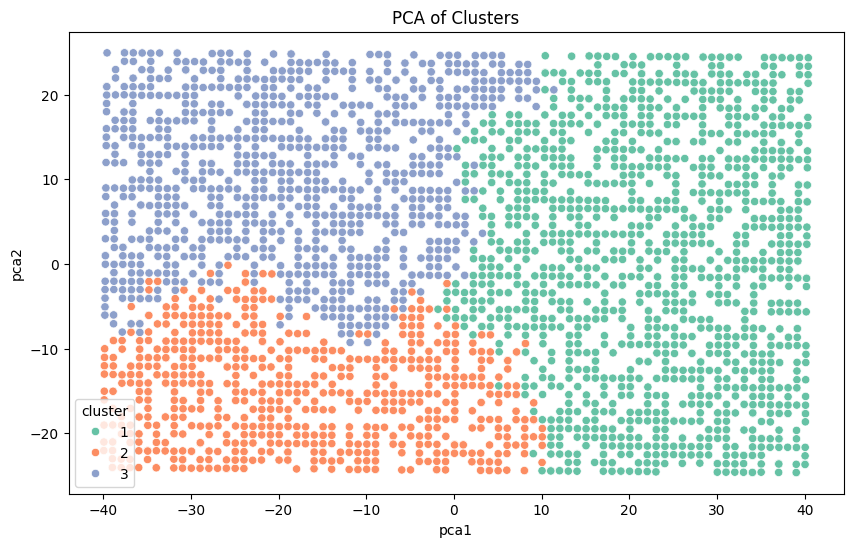

In [446]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numerical_features])
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set2')
plt.title('PCA of Clusters')
plt.show()

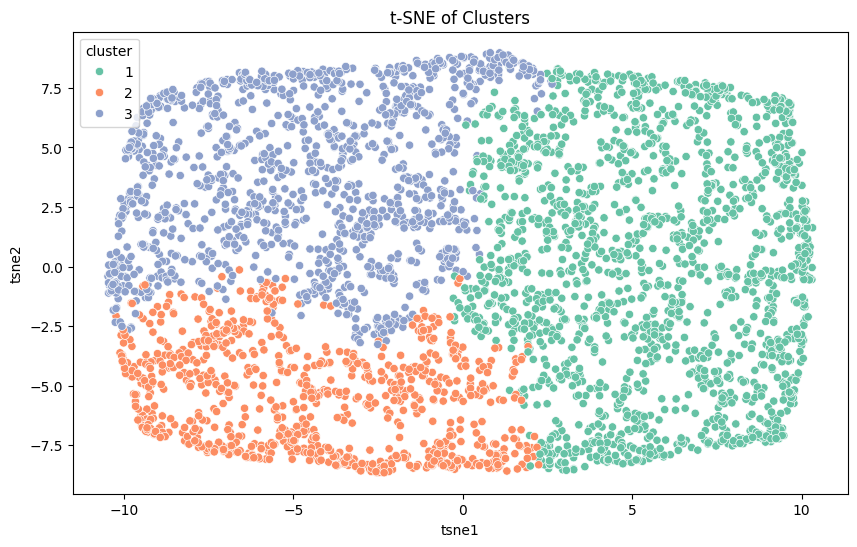

In [447]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(df[numerical_features])
df['tsne1'] = tsne_result[:, 0]
df['tsne2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df, palette='Set2')
plt.title('t-SNE of Clusters')
plt.show()

In [448]:
df.columns

Index(['Gender', 'Category', 'Purchase Amount (USD)', 'Size', 'Season',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Previous Purchases', 'Payment Method', 'Frequency of Purchases',
       'Age_Group', 'Item Category', 'Locations', 'Colors', 'Review_Ratings',
       'cluster', 'pca1', 'pca2', 'tsne1', 'tsne2'],
      dtype='object')

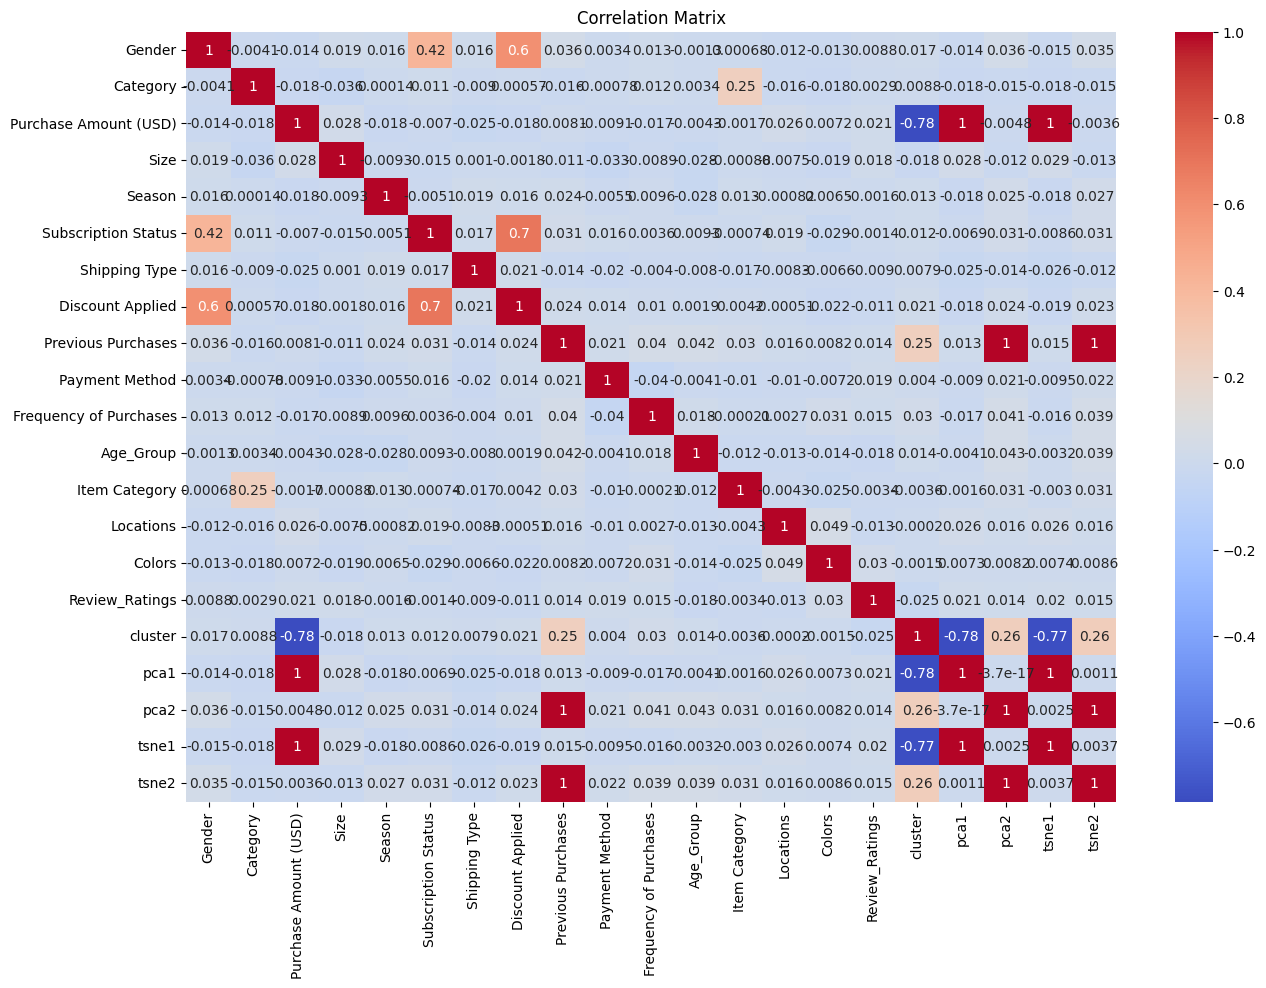

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.var()

,0
Gender,0.217656
Category,0.804049
Purchase Amount (USD),560.997806
Size,0.865822
Season,1.248217
Subscription Status,0.197151
Shipping Type,2.881815
Discount Applied,0.245163
Previous Purchases,208.719426
Payment Method,2.858274


In [449]:
Aise = ['Gender','Category','Size','Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Payment Method', 'Frequency of Purchases', 'Age_Group','Item Category','Locations','Colors','Review_Ratings']

for items in Aise:
  print(df[[items]].value_counts())
  print(" ")

Gender
1         2652
0         1248
Name: count, dtype: int64
 
Category
1           1737
0           1240
2            599
3            324
Name: count, dtype: int64
 
Size
1       1755
0       1053
2        663
3        429
Name: count, dtype: int64
 
Season
1         999
0         975
3         971
2         955
Name: count, dtype: int64
 
Subscription Status
0                      2847
1                      1053
Name: count, dtype: int64
 
Shipping Type
2                675
4                654
5                650
3                648
1                646
0                627
Name: count, dtype: int64
 
Discount Applied
0                   2223
1                   1677
Name: count, dtype: int64
 
Payment Method
4                 677
2                 671
1                 670
3                 636
5                 634
0                 612
Name: count, dtype: int64
 
Frequency of Purchases
2                         584
0                         572
5                         563

In [318]:
df['Colors'].value_counts()

,count
Colors,
4,1215
1,981
2,941
0,616
3,147
